<a href="https://colab.research.google.com/github/kidd000/Acerbi_Textbook/blob/main/acerbi_CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

これまでに、バイアスのない伝達（第1章）と突然変異（バイアスなしとバイアスありの両方）（第2章）を見てきました。それでは、バイアスのある伝達を見て、このセットを完成させましょう。これは、ある形質が別の形質よりもコピーされる可能性が高い場合に起こります。選択が形質の特徴に依存している場合、これはしばしば「直接」または「内容」バイアスと呼ばれます。選択がデモンストレータ（コピー元の個人）の特徴に依存する場合は、「間接」または「文脈」バイアスと呼ばれることが多い。どちらも「文化的選択/淘汰」と呼ばれることもありますが、これは、ある形質が別の形質よりもコピーされる（＝正の淘汰を受けている）からです。この章では、形質に基づく（直接、内容）バイアスについて見ていきます。

(余談ですが、文化的進化の分野では、前の段落で示されているように、様々な用語が混同されています。だからこそ、モデルが非常に有用なのです。言葉や口頭での説明は曖昧になることがあります。多くの場合、書き手は彼らの説明に隠された仮定や認識されていない曖昧さがあることに気づいていません。彼らは、「文化的選択」の意味するところが、他の誰かがそれをどのように使うかとは全く違うことに気づいていないのかもしれません。モデルが優れているのは、特定の用語やプロセスが何を意味しているのかを正確に特定しなければならないからです。上の段落にある言葉を使ってバイアスのある伝達を説明することはできますが、それが本当に明確になるのは、私たちの仮定をすべて明示してモデル化したときだけです)。

# **3.1　　直接バイアスのかかった伝達のシンプルなモデル**

バイアスのある伝達をシミュレーションするために、第1章のシミュレーションに引き続き、2つの形質AとBがあり、各個体がランダムに前世代から文科親を選ぶ（斜行伝達が行われる）と仮定します。しかし、ここでは、形質がコピーされる確率を2つの異なる確率で与えます。ある個体がAの特徴を持つ別の個体に遭遇したとき、その個体は確率saでその個体をコピーします。形質Bを持つ個体に遭遇したとき、その個体は確率sbでコピーします。

sa=sbの場合、コピーはバイアスがなく、個体は同じ確率で遭遇した形質に切り替えます。この設定では、伝達の際バイアスがない場合のシミュレーションの結果が生じます。sa=sb=1sの場合、モデルは第1章と全く同じである。この章で扱う状況は、sa>sb (またはsa<sb)の場合で、伝達にバイアスがかかっている場合です。もしかしたら、A（またはB）の方が効果的な道具であったり、記憶に残る話であったり、発音しやすい言葉であったりするのかもしれません。

まずは関数を書いて、こうした状況では結果がどうなるのかを探っていきましょう。以下は、これらの考え方をすべて実装した関数 `biased_transmission_direct()` です。


In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def biased_transmission_direct (N, s_a, s_b, p_0, t_max, r_max):
  # 文化形質を設定
  cultural_trait = ["A","B"]

  #アウトプット用のデータフレームを作成
  ##run列となるリスト
  run = np.repeat(range(1, r_max + 1), repeats=t_max, axis=0)
  
  ##generation列となるリスト
  generation = np.array(list(range(1, t_max + 1)) * r_max)

  ##p(Aの頻度)列となるリスト
  p = np.zeros(t_max * r_max)

  output = pd.DataFrame()
  output["run"] = run
  output["generation"] = generation
  output["p"] = p

  # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy2次元アレーで代用
  p_array = np.zeros((r_max, t_max))

  for r in range(r_max):
    # 1世代目のpopulationを作る
    population_trait = list(np.random.choice(cultural_trait, size=N, p=[p_0, 1 - p_0], replace=True))

    # 各ラン、初めの世代のpを埋める
    p_array[r, 0] = population_trait.count("A")/N

    for t in range(1, t_max):
      # 前世代のpopulation_traitリストを作る (現世代のpopulationに伝達や淘汰などで変更を加える前に)
      previous_population_trait = population_trait

      # デモンストレータのアレーを作る-previous_populationからランダムに選ぶ試行をN人分
      demonstrator_trait = np.random.choice(a = previous_population_trait, size = N, replace = True)

      # コピー(斜行伝達)にバイアスをかけるため、populationが形質A・Bをコピーするかどうかを設定
      copy_a = np.random.choice([True, False], size=N, p=[s_a, 1-s_a], replace = True)
      copy_b = np.random.choice([True, False], size=N, p=[s_b, 1-s_b], replace = True)
      # それぞれの形質をコピーしたいpopulationのindexをあらかじめ取得
      copy_a_index = [e for e, x in enumerate(copy_a.tolist()) if x == True]
      copy_b_index = [e for e, x in enumerate(copy_b.tolist()) if x == True]

      # 遭遇したデモンストレータが形質Aを持っており、個人（コピー側）が形質Aをコピーしたい(copy_aがTrue)とき、形質Aをコピーする
      for a in copy_a_index:
        if demonstrator_trait[a] == "A":
          population_trait[a] = "A"

      # 遭遇したデモンストレータが形質Bを持っており、個人（コピー側）が形質Bをコピーしたい(copy_bがTrue)とき、形質Bをコピーする
      for b in copy_b_index:
        if demonstrator_trait[b] == "B":
          population_trait[b] = "B"

      # numpy2次元アレーに形質Aを持つ人数の頻度を代入
      p_array[r, t] = population_trait.count("A") / N

  # numpy2次元アレーをpandasのデータフレームへとラン毎に代入
  output = output.assign(p = p_array.flatten())

  #結果（プロットするデータ）をリターン
  return output

In [2]:
# 結果をプロットするための関数を定義
import seaborn as sns

def plot_multiple_runs(data_model):
    # 世代数取得
    t_max = data_model["generation"].max()

    # 体裁いじいじ
    sns.set_palette("hls",n_colors=24)
    sns.set('poster', 'whitegrid', 'dark', font_scale=1,
            rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
    
    # ランごとの平均値推移
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.lineplot(x="generation", y="p", hue="run", data=data_model, legend = "full", palette="hls")

    # 全ランの平均値推移
    data_model = data_model.set_index(["generation"])
    p_mean_list = data_model["p"].mean(level="generation")
    plt.plot(p_mean_list,marker="None",linestyle="-",linewidth=3.0,color="black")

    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="run")
    plt.ylim(-0.1, 1.1)
    plt.xlabel("Generation")
    plt.ylabel("Frequency")
    plt.show()

`biased_transmission_direct()`の大部分は、以前のモデルからの使いまわしです。以前と同様に、複数回のランから出力された`output`データ構造を初期化し、世代t=1では、各個体の形質を保持するためのpopulation形質リストを作成します。

主な変更点は、バイアスのある伝達を含めるようになったことです。まず、前世代のデモンストレータをランダムに選択し（`unbiased_transmission()`で使用したのと同じコードを使用）、その形質をdemonstrator_traitに格納します。次に、`biased_mutation()`で用いたのと同じコードを用いて、population全体についてAをコピーする確率とBをコピーする確率を求めます。ここでも、`biased_mutation()`と同じコードを用いて、個体に指定した確率で形質をコピーさせます。

では、関数 `biased_transmission_direct() `を実行してみましょう。先ほどと同じように、結果をプロットするには、第1章で書いた関数` plot_multiple_runs() `を使います。

上で述べたように、興味深いのは、一方の形質が他方の形質よりも有利な（高い確率でコピーされる）場合です。例えば、sa=0.1、sb=0と仮定することができます。
これは、形質Aを持つ個体に遭遇したとき、10回に1回はコピーしますが、形質Bを持つ個体に遭遇したときには、決してコピーしないことを意味します。また、好ましい（コピーされやすい）形質であるAがpopulationの中で最初はまれな形質であると仮定することもできます（p0=0.01）。この最初はまれな形質が選択によってどのように有利になるかを見ることができます（p0は0よりも高くなければならないことに注意してください)。


In [3]:
data_model = biased_transmission_direct(N = 10000, s_a = 0.1, s_b = 0, p_0 = 0.01, t_max = 150, r_max = 5)

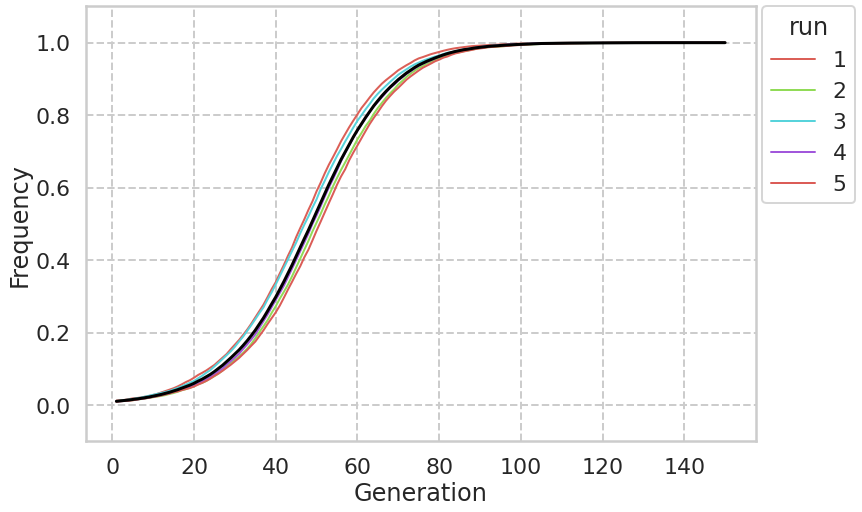

In [4]:
plot_multiple_runs(data_model)

適度な選択の強さでは、Aが徐々にBに取って代わり、固定化されていくのがわかります。これは以下のような特徴的な形で生じます：増加傾向は最初はゆっくりで、その後速度を上げていき、その後プラトーになります。

バイアスのある突然変異との違いに注目してください。バイアスのある突然変異がR型で、最初の上昇が急だったのに対し、バイアスのある伝達はS型で、最初の上昇が遅いのです。これは、バイアスのある伝達の強さ（一般的な選択と同様に）がpopulationのバリエーションに比例するからです。Aが最初に稀な場合、Aを持つ別の個体を選ぶ可能性はわずかですが、Aが広まるにつれて、Aの個体を選ぶ可能性が高くなります。Aが非常に一般的になると、コピー先のBの個体はほとんど残りません。その代わり、バイアスのある突然変異の場合は、コピー（形質の切り替え）の確率はpopulationのバリエーションに依存しません。

# **3.2　　選択の強さ**

選択の強さは何に依存するのでしょうか? 第一に、選択の強さは sa と sb の特定の値に依存しません。重要なのはその相対的な差で、上の例では sa-sb=0.1 です。例えば、sa=0.6、sb=0.5でシミュレーションを実行すると、同じパターンが見られますが、わずかにノイズが多くなっています。つまり、前のシミュレーションと比較して、それぞれのシミュレーションはよりばらつきが大きくなっています。これは、AからBへの切り替えが可能になったためです。

In [5]:
data_model_2 = biased_transmission_direct(N = 10000, s_a = 0.6, s_b = 0.5, p_0 = 0.01, t_max = 150, r_max = 5)

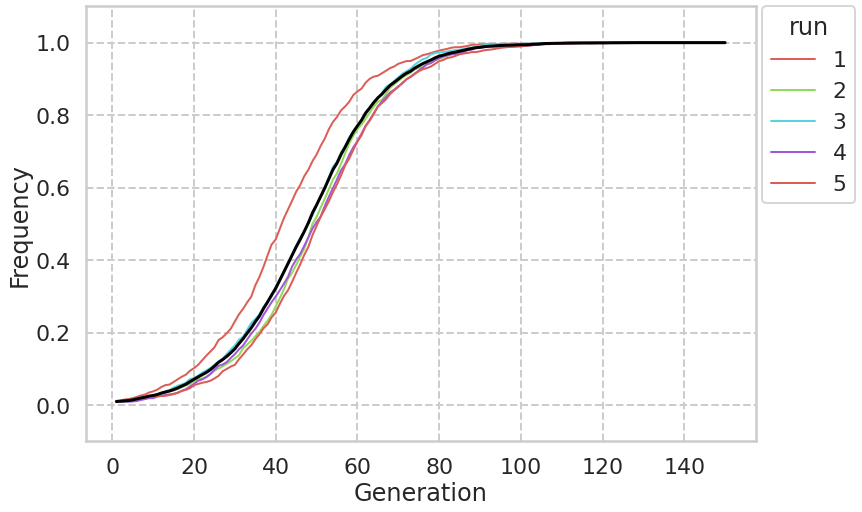

In [6]:
plot_multiple_runs(data_model_2)

選択の強さを変更するには、saとsbの差を変更する必要があります。sa=0.2とし、sb=0のままにすることで、選択の強さを2倍にすることができます。

In [7]:
data_model_3 = biased_transmission_direct(N = 10000, s_a = 0.2, s_b = 0, p_0 = 0.01, t_max = 150, r_max = 5)

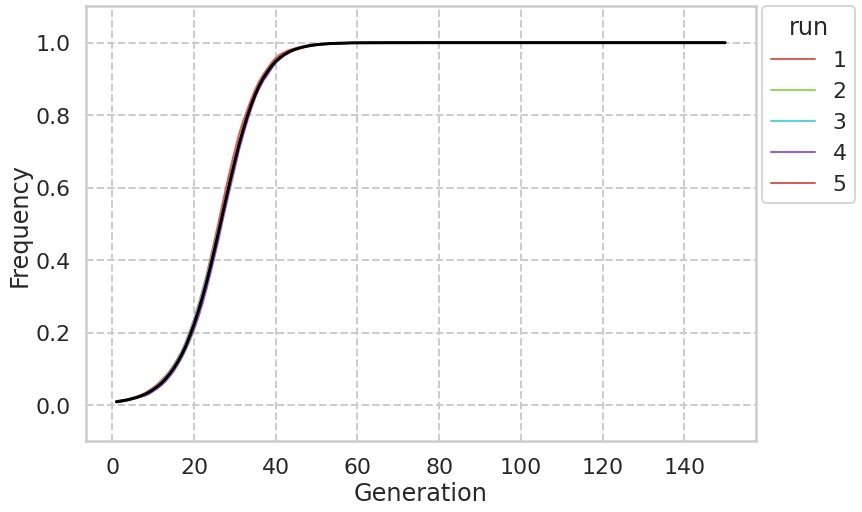

In [8]:
plot_multiple_runs(data_model=data_model_3)

予想されるように、選択の強さを増すと、Aが固定される速度が速くなります。しかし、いまだにS字型であることに注意してください。

# **3.3　　モデルのまとめ**

私たちは、バイアスのある伝達によって、文化的選択のかかった形質が、たとえそれが最初は非常に稀なものであっても、集団の中で広まり、固定化されていく様子を見てきました。バイアスのある伝達は、その動態が偏った突然変異とは異なります。その作用は、それが作用する時点での集団のバリエーションに比例する。バリエーションが大きいとき（我々のモデルでは、p=0.5でAとBの数が等しいとき）に最も強く、バリエーションが小さいとき（pが0または1に近いとき）に最も弱くなります。

# **3.4 　 さらに学びたい人のために**

Boyd and Richerson (1985)は直接バイアスをモデル化し、Henrich (2001)は誘導された変異/バイアスのある突然変異モデルに直接バイアスの文化伝達を追加して、ここで生成されたものと同様のS字カーブを生成することを示しました。しかし、その後の研究では、S字カーブが他のプロセス（例えば、Reader (2004)）を介して生成されうることが示されており、バイアスのある伝達の決定的な証拠と考えるべきではないことに注意してください。